In [120]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# TODOs
- should the data structure be a pandas dataframe or just 2 massive np arrays? which is computationally better?

In [121]:
# load in data
all_puzzles = pd.read_csv('sudoku_500.csv') 

# convert strings of ints to 9x9 numpy arrays
transformed = all_puzzles.map(lambda x: np.array([int(i) for i in list(x)]).reshape((9, 9)))

# isolate unsolved puzzles and their solutions
puzzles = transformed["puzzle"]
solutions = transformed["solution"]

In [122]:

# Function to count zeros in a puzzle
def count_zeros(puzzle):
    return np.count_nonzero(puzzle == 0)

# Create a dictionary to store puzzles and their zero counts
zero_counts = {}
for i in range(len(puzzles)):
    puzzle = puzzles.iloc[i]
    num_zeros = count_zeros(puzzle)
    zero_counts[i] = num_zeros

# Sort the dictionary by zero count
sorted_counts = sorted(zero_counts.items(), key=lambda x: x[1])

# 1) Find the puzzle with most number of 0s
max_zeros_idx = sorted_counts[-1][0]
max_zeros_count = sorted_counts[-1][1]

# 2) Find the puzzle with least amount of 0s
min_zeros_idx = sorted_counts[0][0]
min_zeros_count = sorted_counts[0][1]

# 3) Calculate the average number of zeros
avg_zeros = (max_zeros_count + min_zeros_count) / 2

# Find the puzzle with the closest number of zeros to the average
closest_avg_idx = min(zero_counts.items(), key=lambda x: abs(x[1] - avg_zeros))[0]
closest_avg_count = zero_counts[closest_avg_idx]

print(f"Puzzle with most zeros: Index {max_zeros_idx}, Count: {max_zeros_count}")
print(f"Puzzle with least zeros: Index {min_zeros_idx}, Count: {min_zeros_count}")
print(f"Average of min and max: {avg_zeros}")
print(f"Puzzle closest to average: Index {closest_avg_idx}, Count: {closest_avg_count}")


Puzzle with most zeros: Index 457, Count: 53
Puzzle with least zeros: Index 488, Count: 18
Average of min and max: 35.5
Puzzle closest to average: Index 3, Count: 35


In [123]:
most_zeros_puzzle = puzzles.iloc[488]
most_zeros_puzzle

array([[6, 9, 0, 5, 8, 3, 0, 1, 2],
       [2, 4, 5, 6, 9, 1, 8, 3, 7],
       [0, 0, 8, 4, 7, 2, 5, 0, 6],
       [8, 6, 1, 7, 4, 0, 2, 5, 0],
       [3, 2, 0, 1, 5, 0, 7, 6, 0],
       [5, 0, 0, 0, 3, 6, 1, 0, 4],
       [4, 5, 6, 3, 1, 7, 9, 2, 8],
       [0, 8, 3, 9, 2, 5, 6, 4, 1],
       [9, 1, 2, 8, 0, 4, 3, 0, 0]])

In [124]:
least_zeros_puzzle = puzzles.iloc[457]
count_zeros(least_zeros_puzzle)

53

In [125]:
avg_zeros_puzzle = puzzles.iloc[closest_avg_idx]
avg_zeros_puzzle

array([[9, 2, 1, 7, 0, 3, 0, 6, 5],
       [7, 8, 4, 1, 0, 0, 0, 2, 0],
       [0, 5, 0, 8, 0, 0, 4, 7, 0],
       [0, 9, 0, 4, 2, 0, 0, 1, 0],
       [2, 6, 7, 3, 0, 1, 5, 0, 0],
       [1, 0, 0, 9, 0, 7, 2, 3, 6],
       [4, 3, 0, 0, 1, 8, 0, 5, 0],
       [0, 1, 2, 5, 7, 9, 0, 0, 0],
       [5, 0, 0, 6, 0, 4, 0, 0, 2]])

In [126]:
for i in range(len(puzzles)):
    print(i, puzzles[i])

0 [[7 0 5 0 4 2 9 0 8]
 [0 2 4 7 0 0 0 3 5]
 [0 0 0 0 5 0 7 0 0]
 [0 0 0 0 3 0 1 0 0]
 [4 0 0 6 0 7 0 5 0]
 [0 5 8 1 0 0 0 7 0]
 [0 4 2 0 0 9 0 0 1]
 [8 0 0 0 0 0 0 2 0]
 [0 9 0 0 0 0 0 0 0]]
1 [[0 0 0 0 2 0 5 0 8]
 [7 0 5 0 3 0 0 0 0]
 [0 2 0 5 0 0 0 3 7]
 [0 0 2 0 0 1 7 0 0]
 [0 7 0 4 0 0 3 0 1]
 [0 0 0 9 7 5 2 6 0]
 [0 1 0 0 0 0 0 0 0]
 [8 5 6 0 0 4 0 0 0]
 [0 0 4 0 0 0 1 5 0]]
2 [[0 6 0 3 1 0 0 7 4]
 [0 0 0 2 4 0 5 6 9]
 [8 4 0 6 0 0 0 0 3]
 [0 2 0 0 5 0 0 9 8]
 [0 0 5 7 0 0 0 4 0]
 [7 0 6 0 3 4 0 0 0]
 [6 0 0 5 0 0 9 0 0]
 [2 9 7 0 0 0 0 0 5]
 [1 5 0 0 9 7 0 0 0]]
3 [[9 2 1 7 0 3 0 6 5]
 [7 8 4 1 0 0 0 2 0]
 [0 5 0 8 0 0 4 7 0]
 [0 9 0 4 2 0 0 1 0]
 [2 6 7 3 0 1 5 0 0]
 [1 0 0 9 0 7 2 3 6]
 [4 3 0 0 1 8 0 5 0]
 [0 1 2 5 7 9 0 0 0]
 [5 0 0 6 0 4 0 0 2]]
4 [[5 4 2 0 7 0 6 0 3]
 [0 0 3 4 0 0 0 1 8]
 [0 1 8 0 6 0 5 4 0]
 [9 0 6 0 0 0 2 0 0]
 [1 2 5 8 0 6 0 0 0]
 [0 0 0 5 0 7 0 0 9]
 [2 8 7 6 0 0 0 0 0]
 [0 0 0 7 0 0 0 0 6]
 [3 6 1 2 0 0 0 0 7]]
5 [[0 3 0 0 1 4 0 0 9]
 [0 4 1 2 0 7 5 0

In [127]:
puzzles[487]

array([[0, 8, 0, 7, 0, 0, 5, 6, 0],
       [0, 1, 5, 2, 0, 0, 0, 3, 0],
       [3, 0, 0, 0, 0, 0, 4, 0, 9],
       [0, 0, 2, 0, 9, 4, 0, 0, 0],
       [4, 5, 0, 1, 0, 8, 2, 9, 0],
       [1, 0, 0, 0, 5, 0, 0, 4, 6],
       [7, 4, 0, 9, 0, 0, 0, 0, 0],
       [5, 9, 3, 0, 2, 7, 6, 0, 0],
       [0, 6, 1, 0, 8, 3, 0, 0, 0]])

In [128]:
import numpy as np
import pandas as pd

# Example: assume 'puzzles_series' is a pandas Series where each element is a 9x9 numpy array.
# puzzles_series = pd.Series([array1, array2, ...])

# Define the function to count zeros in a puzzle (9x9 numpy array)
def count_zeros(puzzle):
    return np.count_nonzero(puzzle == 0)

# Find indices where the puzzle has exactly 30 zeros
indices_with_30_zeros = [idx for idx, puzzle in puzzles.items() if count_zeros(puzzle) == 37]

print("Indices of puzzles with exactly 30 zeros:", indices_with_30_zeros)


Indices of puzzles with exactly 30 zeros: [45, 46, 105, 129, 228, 253, 260, 292, 349, 374, 418, 489]


In [129]:
print(count_zeros(puzzles[457]))
print(count_zeros(puzzles[488]))
print(count_zeros(puzzles[3]))
print(count_zeros(puzzles[6]))
print(count_zeros(puzzles[32]))
print(count_zeros(puzzles[164]))
print(count_zeros(puzzles[10]))

53
18
35
33
30
47
45


(array([ 25., 165., 310.]),
 array([18.        , 29.66666667, 41.33333333, 53.        ]),
 <BarContainer object of 3 artists>)

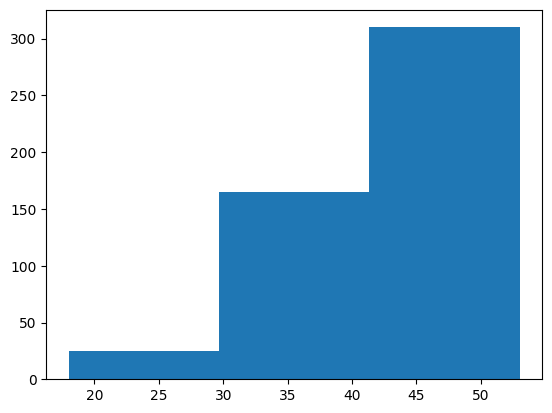

In [130]:
num_zeros = [count_zeros(puzzles[i]) for i in range(len(puzzles))]

plt.hist(num_zeros, bins=3)

In [131]:
easy_ind = [idx for idx, puzzle in puzzles.items() if count_zeros(puzzle) < 30]
print(easy_ind)
for i in range(len(easy_ind)):
    print(i, count_zeros(puzzles[i]))
    """if count_zeros(puzzles[i]) < 30:
        print(i, "NO")"""

#print(count_zeros(puzzles[15]))
#print(count_zeros(puzzles[166]))

[15, 38, 43, 78, 104, 130, 132, 152, 166, 182, 202, 218, 220, 248, 267, 340, 384, 393, 408, 422, 433, 471, 476, 488, 492]
0 51
1 51
2 45
3 35
4 44
5 44
6 33
7 53
8 40
9 46
10 45
11 44
12 44
13 33
14 48
15 26
16 43
17 38
18 43
19 40
20 39
21 48
22 36
23 42
24 45


In [132]:
easy_ind = []
medium_ind = []
hard_ind = []
for i in range(len(puzzles)):
    if count_zeros(puzzles[i]) < 30:
        easy_ind.append(i)
    elif count_zeros(puzzles[i]) < 42:
        medium_ind.append(i)
    else:
        hard_ind.append(i)



In [133]:
for i in range(len(easy_ind)):
    if count_zeros(puzzles[easy_ind[i]]) > 30:
        print(i, count_zeros(puzzles[easy_ind[i]]))

for i in range(len(medium_ind)):
    if count_zeros(puzzles[medium_ind[i]]) > 42 or count_zeros(puzzles[medium_ind[i]]) < 30:
        print(i, count_zeros(puzzles[medium_ind[i]]))

for i in range(len(hard_ind)):
    if count_zeros(puzzles[hard_ind[i]]) < 42:
        print(i, count_zeros(puzzles[hard_ind[i]]))

In [134]:
print(len(easy_ind))
print(len(medium_ind))
print(len(hard_ind))

25
165
310


In [137]:
selected_easy = list(np.random.choice(easy_ind, size=5, replace=False))
selected_medium = list(np.random.choice(medium_ind, size=5, replace=False))
selected_hard = list(np.random.choice(hard_ind, size=5, replace=False))
print(selected_easy)
print(selected_medium)
print(selected_hard)

[78, 182, 267, 15, 166]
[155, 458, 447, 208, 337]
[251, 348, 221, 412, 451]


In [138]:
for i in range(len(selected_easy)):
    if count_zeros(puzzles[selected_easy[i]]) > 30:
        print("easy", selected_easy[i], count_zeros(puzzles[selected_easy[i]]))

for i in range(len(selected_medium)):
    if count_zeros(puzzles[selected_medium[i]]) > 42 or count_zeros(puzzles[selected_medium[i]]) < 30:
        print("medium", selected_medium[i], count_zeros(puzzles[selected_medium[i]]))

for i in range(len(selected_hard)):
    if count_zeros(puzzles[selected_hard[i]]) < 42:
        print("hard", selected_hard[i], count_zeros(puzzles[selected_hard[i]]))

In [139]:
mutate = [1, 2, 3, 4, 5, 6, 7, 8, 9]
print(mutate[:3])
print(mutate[3:6])
print(mutate[6:])

[1, 2, 3]
[4, 5, 6]
[7, 8, 9]
